In [25]:
import tensorflow as tf
import csv
import numpy as np
import matplotlib.pyplot as plt
from random import uniform
import pandas as pd

In [26]:
import tensorflow.compat.v1 as tf

In [3]:
def J(X, y, theta):
    preds = np.squeeze(np.matmul(X, theta))
    temp =  preds - np.squeeze(y)
    return np.sqrt(np.sum(np.matmul(np.transpose(temp), temp)))

In [7]:
df = pd.read_csv("wines.csv")
df.head(10)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510


In [18]:
df.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13]].values

array([[1.780e+00, 2.140e+00, 1.120e+01, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [2.360e+00, 2.670e+00, 1.860e+01, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.950e+00, 2.500e+00, 1.680e+01, ..., 8.600e-01, 3.450e+00,
        1.480e+03],
       ...,
       [4.280e+00, 2.260e+00, 2.000e+01, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [2.590e+00, 2.370e+00, 2.000e+01, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [4.100e+00, 2.740e+00, 2.450e+01, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
#########################################################################
#   Read Data
#########################################################################


with open('wine.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader) # to skip the header file
    X = []
    y = []
    for row in csv_reader:
        X.append([float(row[0]), 1])
        y.append(float(row[1]))

X = np.asarray()
y = np.asarray(y)

In [27]:
X = np.asarray(df.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13]].values)
y = np.asarray(df.iloc[:, 1].values)

In [28]:

#########################################################################
#   Closed-form method
#########################################################################

theta_direct = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), y)

print('Solution (closed-form): J={:.1f}, Theta=({:.2f}, {:.2f})'.format(J(X,y, theta_direct), theta_direct[0], theta_direct[1]))

NameError: name 'J' is not defined

In [29]:
#########################################################################
#   Gradient Descent method
#########################################################################

learning_rate = 0.0000001
tot_iterations = 100

theta_gd = [uniform(0., 0.5), uniform(750., 1000.)]

for i in range(tot_iterations):
    t_0 = 0
    t_1 = 0
    for j in range(len(y)):
        t_0 +=  (theta_gd[0] * X[j][0] + theta_gd[1] - y[j]) * X[j][0]
        t_1 +=  theta_gd[0] * X[j][0] + theta_gd[1] - y[j]

    t_0 /= len(y)
    t_1 /= len(y)

    theta_gd[0] = theta_gd[0] - learning_rate * t_0
    theta_gd[1] = theta_gd[1] - learning_rate * t_1

print('Solution (Gradient descent): J={:.1f}, Theta=({:.2f}, {:.2f})'.format(J(X,y, theta_gd), theta_gd[0], theta_gd[1]))

NameError: name 'J' is not defined

In [30]:
tf.compat.v1.disable_eager_execution()

In [62]:
#########################################################################
#   Tensor flow
#########################################################################

sess = tf.Session()

# Graph Definition

x_data = tf.placeholder(shape=[None, len(X[0])], dtype=tf.float64)
y_target = tf.placeholder(shape=[None], dtype=tf.float64)

theta_gd_initial = np.random.uniform(-0.5, 0.5, size=(len(X[0]),))
#weights = tf.Variable(tf.random.uniform(shape=[1, len(X[0])], minval=750., maxval=1000))
weights = tf.Variable(tf.convert_to_tensor(theta_gd_initial))
#criar um vetor para os 12 pesos


In [63]:
# Define the Model
with tf.variable_scope('model_definition') as scope:
    model_output = 1.0/(1.0 + tf.exp(- tf.matmul(x_data, tf.expand_dims(weights,1))))
    scope.reuse_variables()


In [64]:
def loss_l2(predict, gt):
    predict = tf.squeeze(predict)
    #predict = tf.Print(predict,["predict: ", tf.shape(predict)])
    resid = predict - gt
    ret = tf.sqrt(tf.reduce_sum(tf.pow(resid, tf.constant(2.))))
    return ret


In [65]:
loss = loss_l2(model_output, y_target)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)


TypeError: Input 'y' of 'Pow' Op has type float32 that does not match type float64 of argument 'x'.

In [12]:
# Graph execution

init = tf.global_variables_initializer()
sess.run(init)


for i in range(tot_iterations):
    sess.run(train_step, feed_dict={x_data: X, y_target: y})

theta_tf = sess.run(weights)
cur_loss = J(X,y, theta_tf)

print('Solution (Tensor flow): J={:.1f}, Theta=({:.2f}, {:.2f})'.format(cur_loss, theta_tf[0][0], theta_tf[1][0]))


Solution (Tensor flow): J=649.3, Theta=(0.34, 893.37)


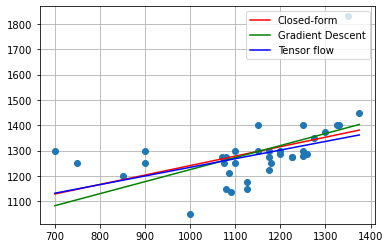

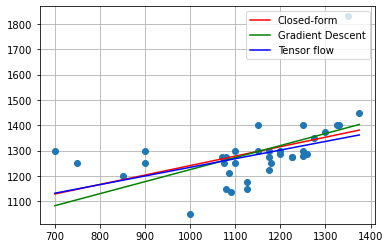

In [ ]:
#########################################################################
#   TResults Visualization
#########################################################################
plt.ion()
plt.figure(2)
plt.plot(X[:,0], y, 'o')
plt.plot([np.min(X[:,0]), np.max(X[:,0])],[theta_direct[0]*np.min(X[:,0])+theta_direct[1], theta_direct[0]*np.max(X[:,0])+theta_direct[1] ] ,'-r', label='Closed-form')
plt.plot([np.min(X[:,0]), np.max(X[:,0])],[theta_gd[0]*np.min(X[:,0])+theta_gd[1], theta_gd[0]*np.max(X[:,0])+theta_gd[1] ] ,'-g', label='Gradient Descent')
plt.plot([np.min(X[:,0]), np.max(X[:,0])],[theta_tf[0]*np.min(X[:,0])+theta_tf[1], theta_tf[0]*np.max(X[:,0])+theta_tf[1] ] ,'-b', label='Tensor flow')
plt.legend(loc='upper right')
plt.grid()
plt.show()
plt.pause(0.1)

In [ ]:
input('Close app?')

''